*NOTE: For this project, I followed the pattern laid out in https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873*

### 1. Plot the data with proper labeling and make some observations on the graph.

In [86]:
# Our import data is a table with months as columns. We need to create a timeseries from this with date objects.
import pandas as pd
import math

from datetime import datetime
from matplotlib import pyplot as plt

raw_sales = pd.read_csv('us_retail_sales.csv')
data = []
for index, row in raw_sales.iterrows():
    year = int(row['YEAR'])
    for month_name, sales in row.items():
        if month_name == 'YEAR':
            continue
        if math.isnan(sales):
            continue
        parsed = datetime.strptime(f'{year}-{month_name}-01', '%Y-%b-%d')
        month_date = parsed.date()
        data.append({
            "month":month_date,
            "sales":int(sales),
        })

sales = pd.DataFrame(data)
sales.set_index('month', inplace=True)
sales = sales.asfreq('MS')
print(sales.shape)
sales.head()

(354, 1)


,sales
month,
1992-01-01,146925
1992-02-01,147223
1992-03-01,146805
1992-04-01,148032
1992-05-01,149010


<Axes: title={'center': 'US Retail Sales'}, xlabel='month'>

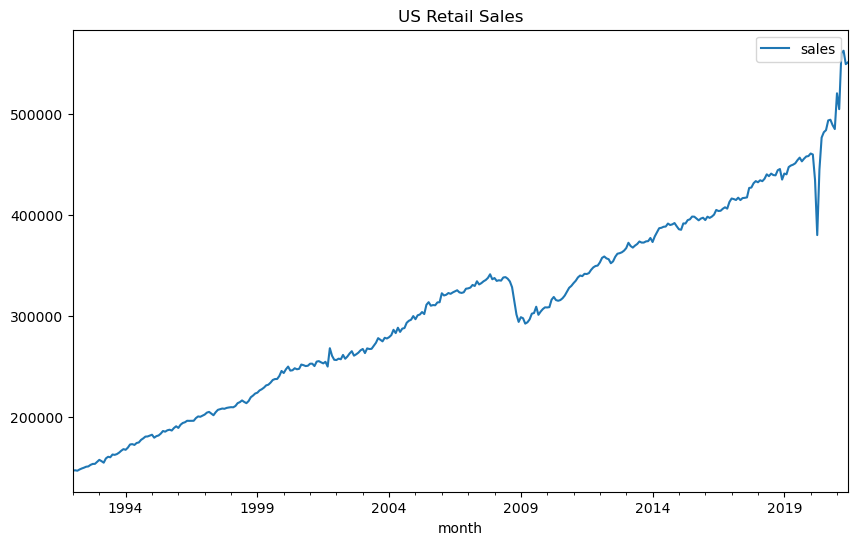

In [87]:
sales[['sales']].plot(title='US Retail Sales',figsize=(10,6))

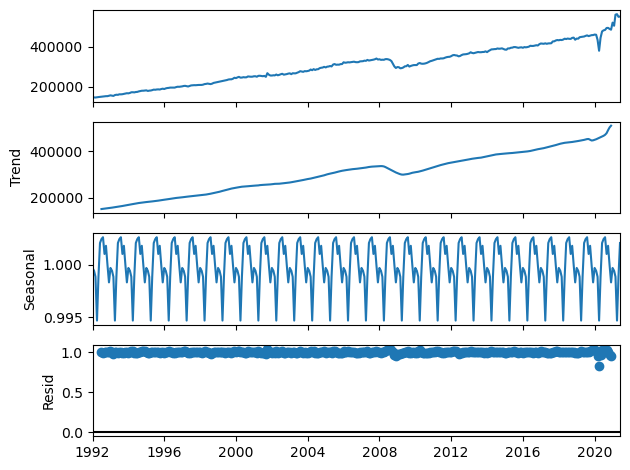

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(x=sales,model='multiplicative',period=12)
decompose_result.plot();

#### Observations

This is strong seasonal data, with a very clear pattern over a twelve-month period. There is a dip for the recession in 2008 and a rapid dip for the pandemic in 2020. The graph seems to be curving up strongly in 2021.

### 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [89]:
# Use all but the last 12 datapoints for training and the last 12 for testing
sales_train = sales[:-12]
sales_test = sales[-12:]

### 3. Use the training set to build a predictive model for the monthly retail sales.

In [90]:
# We'll use triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ignore out-of-date warning.
# https://stackoverflow.com/a/77326078
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

model = ExponentialSmoothing(sales_train['sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

### 4. Use the model to predict the monthly retail sales on the last year of data.

Text(0.5, 1.0, 'Holt Winters Model with Train, Test, and Predicted Data')

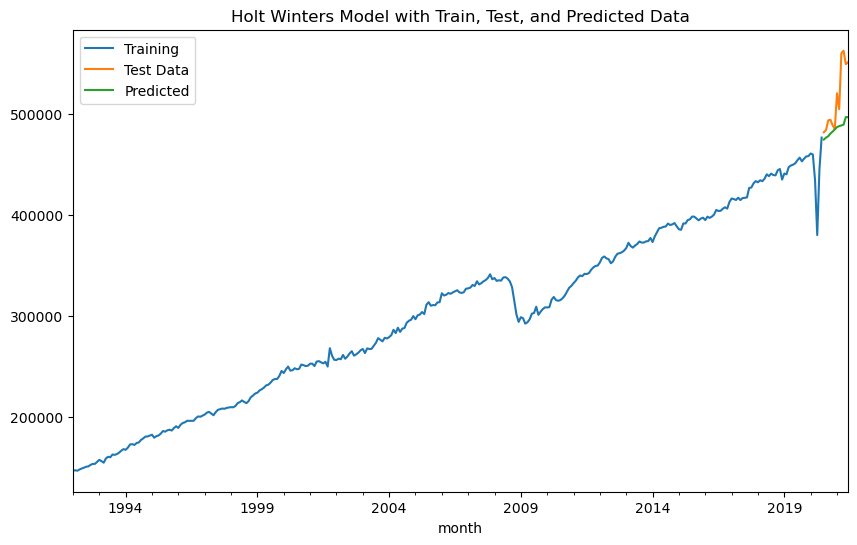

In [91]:
predictions = model.forecast(12)
sales_train['sales'].plot(legend=True,label='Training')
sales_test['sales'].plot(legend=True,label='Test Data',figsize=(10,6))
predictions.plot(legend=True,label='Predicted')
plt.title('Holt Winters Model with Train, Test, and Predicted Data')

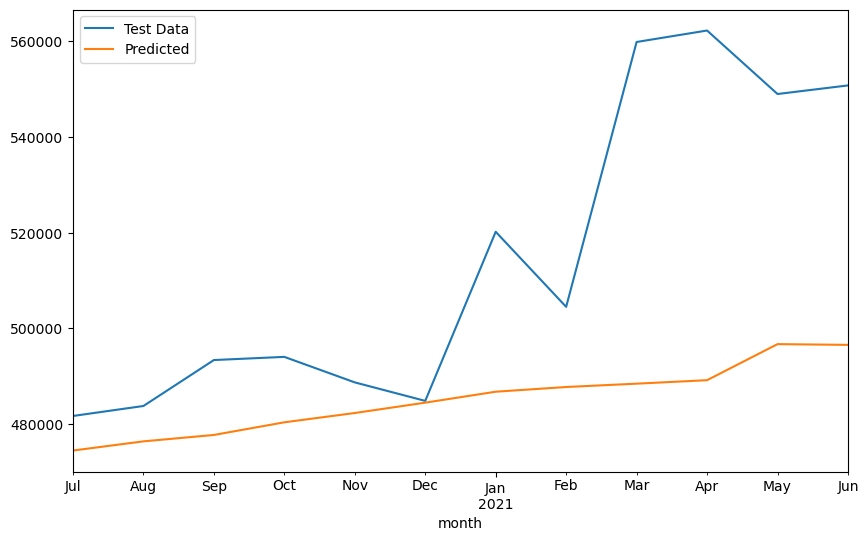

In [92]:
sales_test['sales'].plot(legend=True,label='Test Data',figsize=(10,6))
predictions.plot(legend=True,label='Predicted');

### 5. Report the RMSE of the model predictions on the test set.

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error = {}'.format(mean_absolute_error(sales_test,predictions)))
print('Mean Squared Error = {}'.format(mean_squared_error(sales_test,predictions)))

Mean Absolute Error = 29353.763381782916
Mean Squared Error = 1510715551.4213026


#### Conclusions

While there is strong seasonality in the data, the model fails to be as accurate as we'd hope because the actual data performs very differently during the last twelve months of the data set (July 2020-June 2021).

If you look below, this same modeling technique was able to predict 2018 with a RMSE of just 2982, which is ten times better than this model was able to predict the last twelve months in the dataset. This just goes to show that predictions can be far off based on outside factors.

Text(0.5, 1.0, 'Holt Winters Model with Train, Test, and Predicted Data')

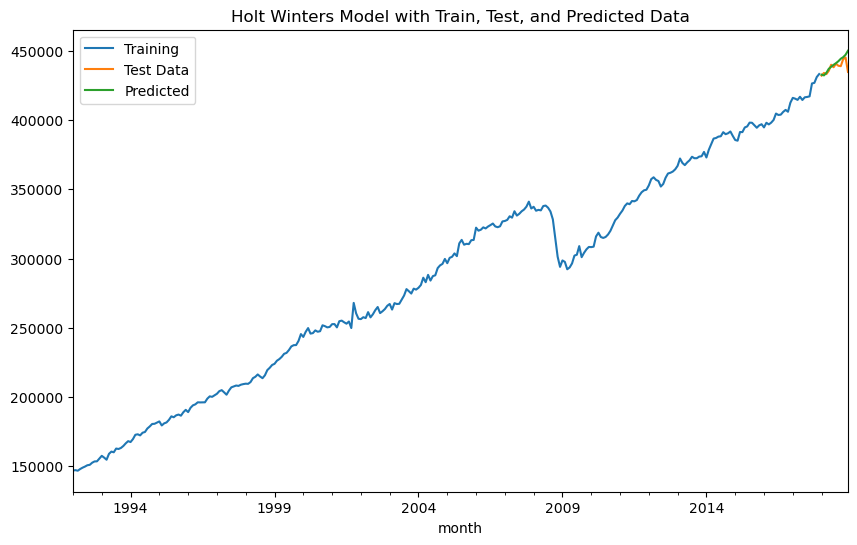

In [94]:
sales_train = sales[:312]
sales_test = sales[312:324]
model = ExponentialSmoothing(sales_train['sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
predictions = model.forecast(12)
sales_train['sales'].plot(legend=True,label='Training')
sales_test['sales'].plot(legend=True,label='Test Data',figsize=(10,6))
predictions.plot(legend=True,label='Predicted')
plt.title('Holt Winters Model with Train, Test, and Predicted Data')

Mean Absolute Error = 2982.3422779903726
Mean Squared Error = 24339093.837639686


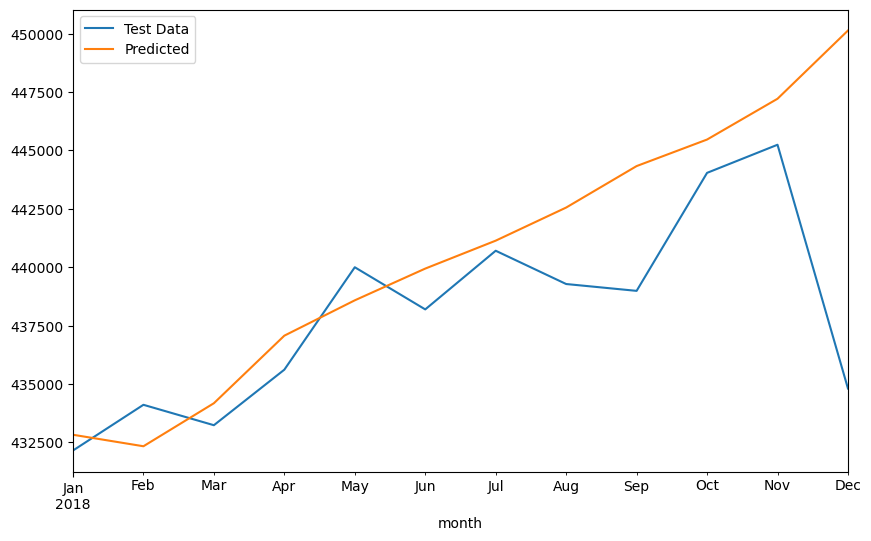

In [95]:
sales_test['sales'].plot(legend=True,label='Test Data',figsize=(10,6))
predictions.plot(legend=True,label='Predicted');
print('Mean Absolute Error = {}'.format(mean_absolute_error(sales_test,predictions)))
print('Mean Squared Error = {}'.format(mean_squared_error(sales_test,predictions)))